In [1]:
import tensorflow as tf 
gpus=tf.config.list_physical_devices("GPU")
print("gpu details",gpus)
print("no of gpu",len(gpus))

gpu details [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
no of gpu 1


In [5]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "/Users/sannyr/miniforge3/lib/python3.10/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "/Users/sannyr/miniforge3/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/Users/sannyr/miniforge3/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "/Users/sannyr/miniforge3/lib/python3.10/site-packages/setuptools/_vendor/packaging/_pa

In [2]:
import tensorflow as tf
print(tf.__version__)

2.16.2


In [7]:
import pandas as pd

In [8]:
df=pd.read_csv("Churn_Modelling.csv")

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
#divide the dataset
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [14]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [31]:
#Feature Eng
geography=pd.OneHotEncoder(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

AttributeError: module 'pandas' has no attribute 'OneHotEncoder'

In [22]:
geography.head()
gender.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [25]:
X=X.drop(["Geography","Gender"],axis=1)

In [26]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [27]:
X=pd.concat([X,geography,gender],axis=1)

In [28]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [35]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [36]:
X_train

array([[-0.06273753, -0.56123442,  1.3834302 , ..., -0.57693971,
        -0.57591331,  0.91727561],
       [ 1.48642225,  1.7064812 , -0.6940696 , ...,  1.73328336,
        -0.57591331,  0.91727561],
       [ 0.34004401, -0.93918702, -1.73281949, ..., -0.57693971,
        -0.57591331, -1.09018488],
       ...,
       [ 1.34183401,  3.50175607,  1.72968016, ..., -0.57693971,
        -0.57591331,  0.91727561],
       [ 0.54659865,  0.57262339, -1.38656953, ..., -0.57693971,
         1.73637245, -1.09018488],
       [ 1.20757349,  0.85608784,  1.3834302 , ..., -0.57693971,
        -0.57591331,  0.91727561]])

In [37]:
X_test

array([[ 1.41412813,  0.28915894,  1.72968016, ..., -0.57693971,
        -0.57591331, -1.09018488],
       [ 0.76348102,  0.19467079, -1.04031956, ...,  1.73328336,
        -0.57591331,  0.91727561],
       [ 2.06477524, -0.75021072, -0.34781963, ..., -0.57693971,
         1.73637245, -1.09018488],
       ...,
       [-0.26929217, -0.27776997, -1.73281949, ..., -0.57693971,
         1.73637245, -1.09018488],
       [-0.64109051,  0.19467079, -1.04031956, ...,  1.73328336,
        -0.57591331,  0.91727561],
       [ 1.57937184,  0.38364709, -0.6940696 , ..., -0.57693971,
         1.73637245,  0.91727561]])

In [38]:
y_train

6207    0
3827    1
4932    0
2556    0
9145    0
       ..
2216    0
9777    0
1205    0
2989    1
8506    0
Name: Exited, Length: 7500, dtype: int64

In [39]:
#Now lets create ann

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [71]:
classifier=Sequential()

In [74]:
#Add input layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dense(units=7,activation="relu"))
classifier.add(Dropout(0.3, noise_shape=None, seed=None, ))
classifier.add(Dense(units=6,activation='relu'))

In [75]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [76]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [77]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
#early stoping
import tensorflow as tf 
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [52]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100


2024-09-01 16:56:34.991781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


503/503 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8088 - loss: 0.4486 - val_accuracy: 0.8441 - val_loss: 0.3857
Epoch 2/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8402 - loss: 0.3914 - val_accuracy: 0.8494 - val_loss: 0.3658
Epoch 3/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8628 - loss: 0.3365 - val_accuracy: 0.8558 - val_loss: 0.3727
Epoch 4/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8608 - loss: 0.3493 - val_accuracy: 0.8582 - val_loss: 0.3526
Epoch 5/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8537 - loss: 0.3572 - val_accuracy: 0.8586 - val_loss: 0.3541
Epoch 6/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8677 - loss: 0.3320 - val_accuracy: 0.8570 - val_loss: 0.3531
Epoch 7/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8614 - loss: 0.3481 - val_accuracy: 0.8582 - val_loss: 0.3582
Epoch 8/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8647 - loss: 0.3362 - val_accuracy: 0.85

In [79]:
model_history2=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stop)

Epoch 1/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7884 - loss: 0.4919 - val_accuracy: 0.8207 - val_loss: 0.4243
Epoch 2/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8271 - loss: 0.4185 - val_accuracy: 0.8304 - val_loss: 0.3916
Epoch 3/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8499 - loss: 0.3866 - val_accuracy: 0.8566 - val_loss: 0.3948


In [80]:
model_history2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

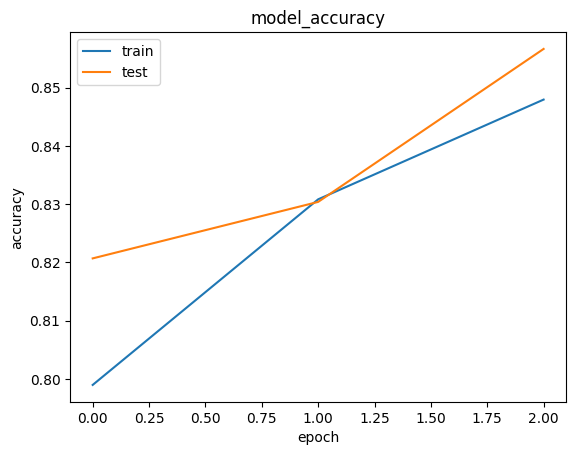

In [81]:
plt.plot(model_history2.history["accuracy"])
plt.plot(model_history2.history["val_accuracy"])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

In [82]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred >=0.5)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [83]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1904,   82],
       [ 301,  213]])

In [84]:
#accuray
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [85]:
score

0.8468

In [86]:
#get the weights
classifier.get_weights()

[array([[-8.96862596e-02,  8.74970853e-02,  8.31816643e-02,
         -1.19534180e-01, -6.95087090e-02, -2.34348223e-01,
          2.56392267e-02, -1.63768694e-01,  1.37875706e-01,
          2.09294371e-02, -1.37022734e-01],
        [ 5.85886776e-01, -1.65818825e-01, -1.17093980e+00,
         -1.06522810e+00, -1.38326895e+00,  9.33865368e-01,
         -7.16027498e-01,  2.06195727e-01, -9.19072255e-02,
         -2.76522666e-01, -8.37700009e-01],
        [-6.77055568e-02, -1.80789619e-03,  2.78828200e-02,
         -3.82397830e-01, -4.74962406e-02,  6.57200888e-02,
          2.88577229e-01, -2.31221523e-02,  1.52826115e-01,
          1.33065693e-02, -2.75858372e-01],
        [ 1.61795914e-01,  4.84745175e-01, -1.44117802e-01,
          5.93410969e-01,  1.21485814e-01,  7.77830556e-02,
          4.44111302e-02,  4.90344316e-01,  3.23875062e-02,
         -9.16418970e-01,  5.95324934e-01],
        [ 1.67590454e-01,  1.81661689e+00,  6.77666128e-01,
          1.32622838e-01,  3.59040856e-01, -